In [2]:
import torch
import torchvision
from torch import nn
import logging
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np

import time
import os
import copy
import logging

import sys
sys.path.append('../')
from Model.Unet_universal import UNet
from Data.get_super_synth_loader import get_dataloader

from Options.Unet_options import * 
from Options.Ures_options import * 


config = ures_v1
# config = unet_v1

In [3]:

model = UNet(in_channels=3, out_channels=config.n_classes, \
          num_hidden_features=config.num_features,n_blocks=config.n_blocks,\
          num_dilated_convs=0, dropout_min=0, dropout_max=config.dropout,\
          block_type=config.block_type, padding=1, kernel_size=3,group_norm=0)


Test_loader = get_dataloader(batch_size= 1,\
                      root_dir = config.test_path,mask_dir=config.mask_dir,\
                                   num_workers=config.num_workers)

state_dict=torch.load('/home/zyx31/DATA_CRLM/Patches/Checkpoints/Unets/Ures_v1/unet_004.pth')
new_state_dict = {}
for key in model.state_dict():
    new_state_dict[key] = state_dict['module.'+key].double()
    
model.load_state_dict(new_state_dict)


torch.Size([3, 448, 448])


(-0.5, 447.5, 447.5, -0.5)

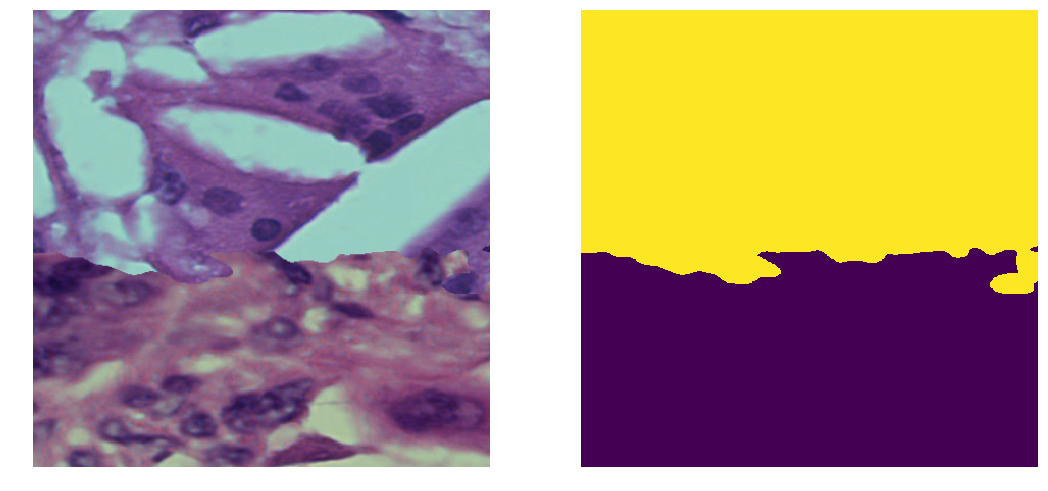

In [89]:
import pylab as plt

a,b = Test_loader.dataset.__getitem__(11)

print(a.shape)
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.imshow(a.permute((1,2,0))/2+0.5)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(b)
plt.axis('off')

torch.Size([1, 11, 448, 448])


(-0.5, 447.5, 447.5, -0.5)

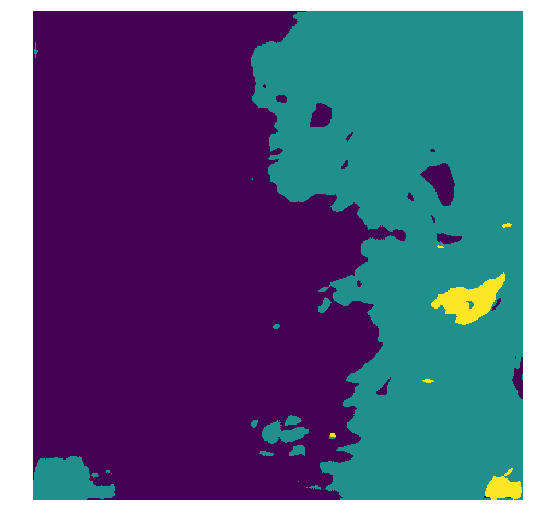

In [82]:
model.cuda()
c=model(a.cuda().float().unsqueeze(0))

print(c.shape)
plt.figure(figsize=(9,9))
plt.imshow(c[0].detach().cpu().numpy().argmax(0))
plt.axis('off')